# Exploring Ottawa Real Estate data

This project explores the Kaggle dataset found here:
https://www.kaggle.com/datasets/tejusrevi/ottawa-real-estate-data/data

## 1. Preliminaries 

In [1]:
# import stuff
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# retrieve data
path = 'datasets'
filename = 'ottawa-realestate-data-2020.csv'

def load_data_csv(path, filename):
    csv_path = os.path.join(path, filename)
    return pd.read_csv(csv_path)

housing = load_data_csv(path, filename)

## 2. Data exploration

In [3]:
# creating a copy of the data for exploration
housing_explore = housing.copy()

### 2.1. Superficial 

In [4]:
housing_explore.head()

,latitude,longitude,postalCode,walkScore,propertyType,style,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,price
0,45.442725,-76.048296,K0A 1L0,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,1127.76,1447.80,"2,500,000"
1,45.146541,-75.941510,K0A 1B0,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,1402.08,609.60,"495,000"
2,45.317009,-76.140878,K0A 1L0,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,638.86,470.92,"365,000"
3,46.179294,-74.727161,K4C 1H9,7.0,Commercial,NaN,2020.0,NaN,NaN,0.0,NaN,545.59,411.48,"799,000"
4,45.314785,-75.563076,K1G 3N4,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,983.60,402.17,"9,830,500"


NB: There are some numerical and categorical values and some "Nan" to deal with

In [5]:
housing_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   latitude      1254 non-null   float64
 1   longitude     1254 non-null   float64
 2   postalCode    1198 non-null   object 
 3   walkScore     1225 non-null   float64
 4   propertyType  1191 non-null   object 
 5   style         1024 non-null   object 
 6   yearBuilt     997 non-null    float64
 7   bedrooms      1040 non-null   float64
 8   bathrooms     1041 non-null   float64
 9   parking       1043 non-null   float64
 10  garage        1015 non-null   float64
 11  lotDepth      700 non-null    float64
 12  lotFrontage   700 non-null    float64
 13  price         1233 non-null   object 
dtypes: float64(10), object(4)
memory usage: 137.4+ KB


In [6]:
housing_explore.describe()

,latitude,longitude,walkScore,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage
count,1254.000000,1254.000000,1225.000000,997.000000,1040.000000,1041.000000,1043.000000,1015.000000,700.000000,700.000000
mean,45.380384,-75.702938,47.623673,1988.313942,3.028846,2.594621,3.463087,1.103448,64.970814,30.768500
std,0.109854,0.149321,31.569012,30.408741,1.387811,1.207720,5.289265,1.147907,149.931632,76.929997
min,44.999742,-77.971481,1.000000,1847.000000,0.000000,0.000000,0.000000,0.000000,5.940000,3.310000
25%,45.343685,-75.744382,20.000000,1974.000000,2.000000,2.000000,1.000000,0.000000,30.180000,10.060000
50%,45.395979,-75.693733,47.000000,1994.000000,3.000000,2.000000,2.000000,1.000000,31.970000,15.240000
75%,45.428189,-75.652013,75.000000,2013.000000,4.000000,3.000000,4.000000,2.000000,42.110000,23.945000
max,48.120345,-74.727161,98.000000,2022.000000,9.000000,9.000000,100.000000,16.000000,1745.710000,1447.800000


NB: Counts don't match, so will need to fill in some blanks. Some anomolies in lot Depth and Frontage to worry about.

### 2.2. Histogram

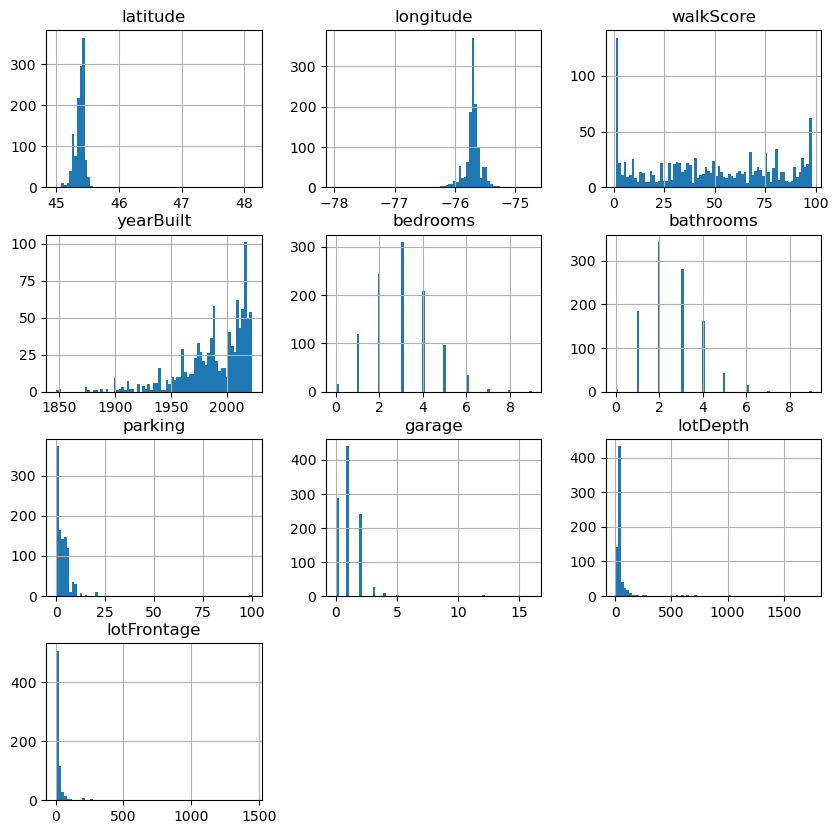

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
housing_explore.hist(bins = 75, figsize=(10,10))
plt.show()

### 2.3. Formats

Get a rough idea of where NaNs are.

In [8]:
nan_counts = housing_explore.isna().sum()
print(nan_counts)
print(round(nan_counts.max()/len(housing_explore)*100,1), "% of the data has at least one NaN")

latitude          1
longitude         1
postalCode       57
walkScore        30
propertyType     64
style           231
yearBuilt       258
bedrooms        215
bathrooms       214
parking         212
garage          240
lotDepth        555
lotFrontage     555
price            22
dtype: int64
44.2 % of the data has at least one NaN


Take a look at the non-numerical categories

In [9]:
for label in list(housing_explore.select_dtypes(include=['object'])):
    print('counts for: ', label)
    print(housing_explore[label].value_counts(dropna=False))

counts for:  postalCode
NaN        57
K0A 1L0    16
K0A 3M0    13
K2P 0E2    12
K0A 1T0    12
           ..
K4A 1G3     1
K2J 6K4     1
K1G 5E4     1
K2T 0E1     1
K0A3M0      1
Name: postalCode, Length: 878, dtype: int64
counts for:  propertyType
Residential      976
Lots/Acreage     108
NaN               64
Multifamily       47
Commercial        24
Single Family     14
Farm               8
Vacant Land        7
Designated         4
Multi-family       2
Retail             1
Name: propertyType, dtype: int64
counts for:  style
Detached           424
Apartment          322
NaN                231
Row Unit           159
Semi Detached       65
2-Storey            21
Stacked             20
3-Storey             4
Bungalow             3
Loft                 2
1 1/2 Storey         1
2 1/2 Storey         1
Bungalow-Raised      1
Multi-Level          1
Name: style, dtype: int64
counts for:  price
499,900      28
399,900      23
NaN          22
299,900      18
699,000      16
             ..
2,795,

In [10]:
# let's reformat "price" to be numerical
if type(housing_explore['price'].iloc[0]) != np.float64:
    housing_explore['price'] = housing_explore['price'].str.replace(',', '').astype('float64')

### 2.4. Anomalies

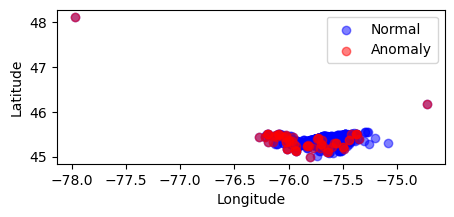

In [11]:
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

# identify the numerical entities
housing_num = housing_explore.select_dtypes(include=['int', 'float'])  # select numerical columns (note: price is here now)
housing_cat = housing_explore.select_dtypes(include=['object'])  # select categorical columns

# impute to resolve NaNs
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing_num)
X_imputed = imputer.transform(housing_num)
housing_num_imputed = pd.DataFrame(X_imputed, columns=housing_num.columns)

# look for anomolies
X_check_anomalies = housing_num_imputed[['longitude', 'latitude', 'price', 'lotDepth']]
clf = IsolationForest(contamination=0.05)  # contamination is proportion of outliers 
clf.fit(X_check_anomalies)
housing_num_imputed['anomalies'] = clf.predict(X_check_anomalies)
anomalies = housing_num_imputed[housing_num_imputed['anomalies'] == -1]

# visualize anomalies
plt.figure(figsize=(5, 2))
plt.scatter(housing_num_imputed['longitude'], housing_num_imputed['latitude'], c='b', label='Normal', alpha=0.5)
plt.scatter(anomalies['longitude'], anomalies['latitude'], c='r', label='Anomaly', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [12]:
# align the anomaly column to the dataset
housing_explore['anomalies'] = housing_num_imputed['anomalies']
# remove those points
housing_explore = housing_explore[housing_explore['anomalies'] != -1]
# and drop the 
housing_explore = housing_explore.drop(columns=['anomalies'])

### 2.5. Visualize the data

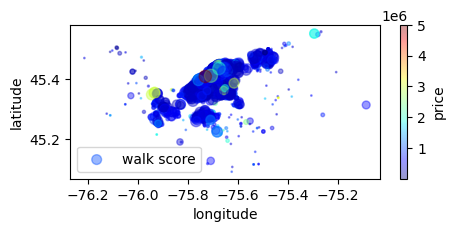

In [13]:
# geographic
ax = housing_explore.plot(kind = 'scatter', x = 'longitude', y = 'latitude', 
             alpha =0.4,s=housing_explore['walkScore'], label='walk score', 
             figsize=(5,2), 
             c = 'price', cmap=plt.get_cmap('jet'), colorbar=True,
            )

## Prepare for Training 

### Steps

0. formats
1. drop irrelevant data
2. drop duplicates
3. deal with NaN/erroneous 
4. deal with outliers
5. deal with missing data (drop, impute)
6. standardize 
7. validate


### Build an ETL pipeline

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest

# custom class for reformatting prices 
class Reformat_prices(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        if type(X['price'].iloc[0]) != 'number':
            X['price'] = X['price'].str.replace(',', '').astype('float64')
        return X

# custom class for removing anomalies
class Remove_anomalies(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        
        X = X.copy()
        
        # seek out anomalies
        X_check = X[self.features]
        
        # need to impute first
        anomaly_imputer = SimpleImputer(strategy = 'median')
        X_check_imputed = anomaly_imputer.fit_transform(X_check)
        
        #X_check_imputed = pd.DataFrame(X_check_imputed, columns=X_check.columns)
        X_check = X_check_imputed.copy()
        
        # run anomaly detection
        clf = IsolationForest(contamination=0.1, random_state = 0)
        clf.fit(X_check)
        X['anomalies'] = clf.predict(X_check)
        #anomalies = X[X['anomalies'] == -1]
        
        # remove the anomalies
        X = X[X['anomalies'] != -1]
        
        # then drop the extra column
        X = X.drop(columns = ['anomalies'])
        
        return X

# custom class for managing NaN's categorical data
class NaNDealer_cat(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        X = X.copy()
        X['postalCode'].fillna('A0A 0A0', inplace = True)
        X['propertyType'].fillna('Unknown', inplace = True)
        X['style'].fillna('Unknown', inplace = True)
        return X     

# custom class for     
    
    
anomaly_features = ['longitude', 'latitude', 'price', 'lotDepth']

# treat numericals and categories separate
cols_nums = list(housing.select_dtypes(include=['number']))
cols_nums.append('price')
cols_cats = list(housing.select_dtypes(include=['object']))
cols_cats.remove('price')

# numerical
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

# categorical
cat_pipeline = Pipeline([
    ('nan_dealer', NaNDealer_cat()),
    ('one_hot', OneHotEncoder()),
])

column_transformer = ColumnTransformer([
    ('num', num_pipeline, cols_nums), # here, count wrong, we have to carry through the movement of prices
    ('cat', cat_pipeline, cols_cats),
])

# full pipeline
full_pipeline = Pipeline([
    ('reformat_prices',Reformat_prices()),
    ('remove_anomalies',Remove_anomalies(anomaly_features)),
    ('column_transformer', column_transformer)
])

# run pipeline
housing_prepared_np = full_pipeline.fit_transform(housing) # array/sparse matrix

# reassemble dataframe
cols_cat_extended = list(full_pipeline.named_steps['column_transformer'].transformers_[1][1].named_steps['one_hot'].get_feature_names_out())
cols_all = cols_nums + cols_cat_extended

# prepared dataset
housing_prepared = pd.DataFrame(housing_prepared_np.toarray(), columns = cols_all)


## Cluster

In [15]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters = 8, random_state = 42, n_init = 'auto')
kmeans.fit(housing_prepared)

# add cluster info to the dataset
housing_prepared_cluster = housing_prepared.copy()

housing_prepared_cluster['cluster_labels'] = kmeans.labels_

#cluster_names = {0: 'Region 0',1: 'Region 1', 2: 'Region 2', 3: 'Region 3', 4: 'Region 4', 5: 'Region 5'}
#housing_prepared_cluster['cluster_name'] = housing_prepared_cluster['cluster_labels'].map(cluster_names)



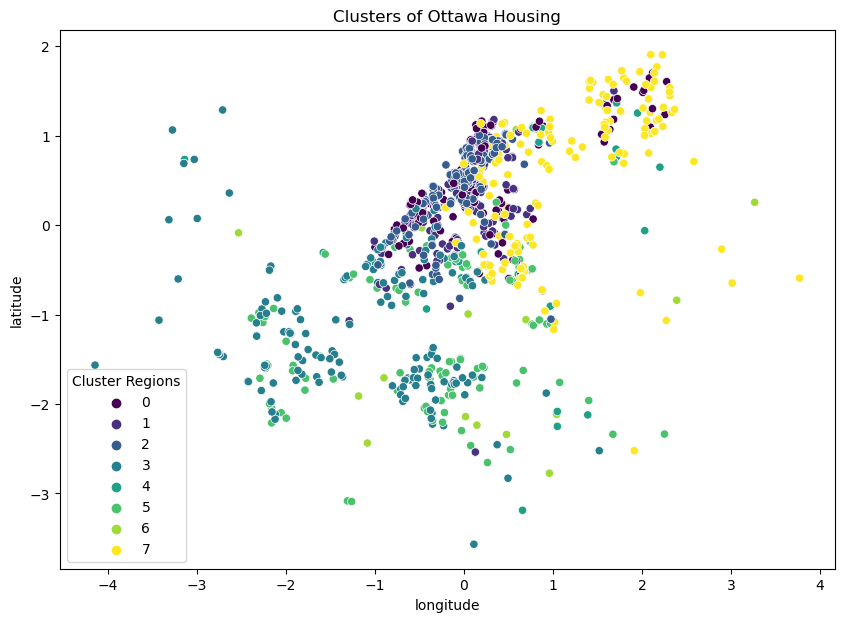

In [16]:
# plot
from scipy.spatial import ConvexHull

plt.figure(figsize=(10, 7))
sns.scatterplot(data = housing_prepared_cluster, 
                x = 'longitude', 
                y = 'latitude', 
                palette='viridis',
                #size = 'bedrooms',
                #sizes=(10, 100),
                hue = kmeans.labels_,
                legend = 'full')

plt.title('Clusters of Ottawa Housing')
plt.legend(title ='Cluster Regions')
plt.show()